In [4]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("Data/BTC_ETH.csv")

In [6]:
data

,Timestamp,BTC,ETH
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23
...,...,...,...
360,2018-03-28,7960.380000,445.93
361,2018-03-29,7172.280000,383.90
362,2018-03-30,6882.531667,393.82
363,2018-03-31,6935.480000,394.07


In [16]:
m = float(data.values[0][1])
for row in data.values:
    if m > (row[1] * 2):
        print(m)
    m = float(row[1])

143805.81666666668
114301.81666666664


In [31]:
def findOutlier(colIndex: int):
    m = float(data.values[0][colIndex])
    for row in data.values:
        if m > (row[colIndex] * 2):
            print(m)
        m = float(row[colIndex])

In [32]:
findOutlier(2)

7166.9
8648.3


In [25]:
data[data["BTC"] > 100000]

,Timestamp,BTC,ETH
336,2018-03-04,114301.816667,8648.3


In [24]:
data.loc[270, "BTC"] = (data.loc[269]["BTC"] + data.loc[271]["BTC"]) / 2

In [26]:
data.loc[270]

Timestamp      2017-12-28
BTC          15114.730833
ETH                7166.9
Name: 270, dtype: object

In [28]:
def fixOutlier(line: int, col: str):
    data.loc[line, col] = (data.loc[line - 1][col] + data.loc[line + 1][col]) / 2

In [29]:
fixOutlier(336, "BTC")

In [33]:
data[data["ETH"] > 7000]

,Timestamp,BTC,ETH
270,2017-12-28,15114.730833,7166.9
336,2018-03-04,11461.244167,8648.3


In [34]:
fixOutlier(270, "ETH")

In [35]:
fixOutlier(336, "ETH")

<Axes: >

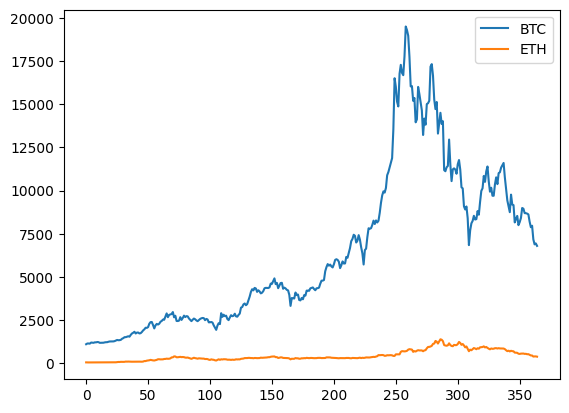

In [43]:
import matplotlib.pyplot as plt
data.plot()

In [37]:
data.isnull()

,Timestamp,BTC,ETH
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
360,False,False,False
361,False,False,False
362,False,False,False
363,False,False,False


In [40]:
data[data["ETH"].isnull() == True]

,Timestamp,BTC,ETH
250,2017-12-08,16007.436667,NaN
251,2017-12-09,15142.834152,NaN
252,2017-12-10,14869.805000,NaN


In [42]:
data["ETH"].bfill(inplace=True)

C:\Users\lk3\AppData\Local\Temp\ipykernel_11248\3193472398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ETH"].bfill(inplace=True)
